<a href="https://colab.research.google.com/github/azizadila/H8_062/blob/main/PYTN_Assgn_2_batch_062_Aziza_Noor_Fadhila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT NUMPY DAN PANDAS

import math
import statistics
import scipy.stats as st
import numpy as np
import pandas as pd
import random
import warnings
import statsmodels.api as sm
import scipy.stats.distributions as dist
import scipy.stats as stats

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
#from IPyhton.core.display import Image

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

In [ ]:
# EXTRACT DATA FROM GDRIVE

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Assignment 1/nyc-rolling-sales.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print('Data has been downloaded and read into a dataframe')

# CLEANSING DATA (RENAME, DAN HAPUS KOLOM)

df.drop(df[df['SALE PRICE'] == ' -  '].index,inplace=True)
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'])
df = df.drop(df.loc[df['SALE PRICE'] <= 100].index)
df['SALE DATE'] = pd.to_datetime(df['SALE DATE']).dt.normalize()

#membuat kolom baru berdasarkan tahun sale date
df['YEAR'] = df['SALE DATE'].dt.year
df['MONTH'] = df['SALE DATE'].dt.month

print('data dimensions:', df.shape)

print(df.head())

Mounted at /content/drive
Data has been downloaded and read into a dataframe
data dimensions: (58757, 23)
   BOROUGH   NEIGHBORHOOD  ...  YEAR MONTH
0        1  ALPHABET CITY  ...  2017     7
3        1  ALPHABET CITY  ...  2016     9
4        1  ALPHABET CITY  ...  2016    11
6        1  ALPHABET CITY  ...  2016     9
9        1  ALPHABET CITY  ...  2016    11

[5 rows x 23 columns]


           NEIGHBORHOOD  ... MONTH
7447        MIDTOWN CBD  ...     5
2559          FINANCIAL  ...     1
2557          FINANCIAL  ...     5
2050            FASHION  ...    11
6317      JAVITS CENTER  ...    12
...                 ...  ...   ...
38490     FLATBUSH-EAST  ...     3
18780        BAYCHESTER  ...     4
37674  FLATBUSH-CENTRAL  ...     4
38533     FLATBUSH-EAST  ...     4
37168     EAST NEW YORK  ...    10

[1281 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


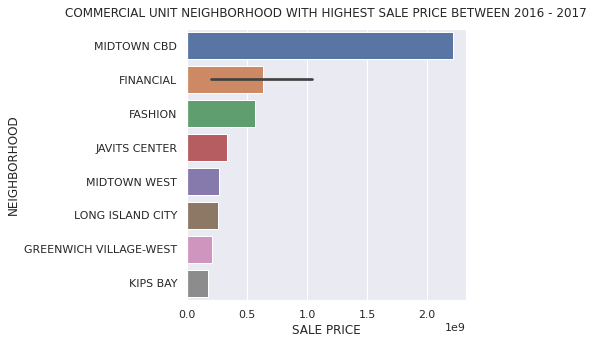

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT TIME OF SALE,SALE PRICE
7447,MIDTOWN CBD,21 OFFICE BUILDINGS,O4,2210000000
2559,FINANCIAL,21 OFFICE BUILDINGS,O4,1040000000
2557,FINANCIAL,21 OFFICE BUILDINGS,O4,652000000
2050,FASHION,21 OFFICE BUILDINGS,O4,565000000
6317,JAVITS CENTER,21 OFFICE BUILDINGS,O3,330000000
9594,MIDTOWN WEST,21 OFFICE BUILDINGS,O5,268124175
66508,LONG ISLAND CITY,27 FACTORIES,F9,257500000
4781,GREENWICH VILLAGE-WEST,21 OFFICE BUILDINGS,O3,205961801
2565,FINANCIAL,25 LUXURY HOTELS,H2,203345000
6681,KIPS BAY,26 OTHER HOTELS,H8,174000000


In [ ]:
#MENCARI COMMERCIAL BUILDING DENGAN HARGA TERTINGGI

#FILTERING DAN SORTING DATA YANG AKAN DIGUNAKNA
df_year = df[(df['RESIDENTIAL UNITS']==0)&(df["COMMERCIAL UNITS"]>0)]
df_sale= df_year.loc[:,('NEIGHBORHOOD','BUILDING CLASS CATEGORY','BUILDING CLASS AT TIME OF SALE','SALE PRICE','YEAR','MONTH')]
df_sale.sort_values(by=['SALE PRICE'],inplace=True,ascending=False)
print(df_sale)

#MENCARI TOP 10 HARGA BANGUNAN TERTINGGI
df_top = df_sale.head(10)
#print(df_top)

#PLOTTING BARCHART
sns.set_style('darkgrid')
sns.barplot(df_top['SALE PRICE'],df_top['NEIGHBORHOOD'])
plt.title('COMMERCIAL UNIT NEIGHBORHOOD WITH HIGHEST SALE PRICE BETWEEN 2016 - 2017',y=1.02)
plt.show()

df_top.iloc[:11,:4]

Dari barchart diatas dapat ditarik kesimpulan sebagai berikut :


*   Neighborhood dengan nilai jual tertinggi ada pada  setiap tahunnya jatuh pada MIDTOWN CBD, FINANCIAL, dan FASHION
*   MIDTOWN CBD sendiri merupakan central business district yang mana fokus pada bangunan commercial, sehingga nilai jualnya jauh diatas area/neighborhood lainnya
*   Building Class dengan nilai jual tertinggi jatuh pada Office Building





Skewness = -0.29598916585516566
Nilai tengah 14.578415830482596
Nilai rata-rata 0    14.508658
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


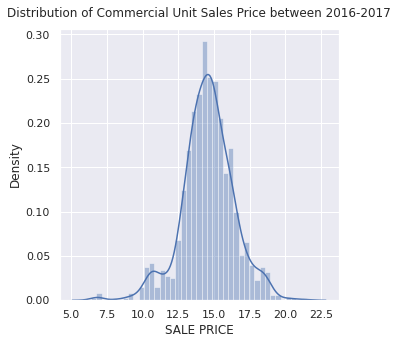

In [ ]:
sales = np.log(df_sale['SALE PRICE'])
print("Skewness =",sales.skew())
sns.distplot(sales)
plt.title("Distribution of Commercial Unit Sales Price between 2016-2017",y=1.02)

print("Nilai tengah",sales.mean())
print("Nilai rata-rata",sales.mode())

Dari nilai skewness diatas dapat disimpulkan bahwa SALE PRICE dari tahun 2016 - 2017 memiliki negative skewness/kemiringan negatif yang berarti distribusi data miri ke kiri dan mean lebih kecil dari mode

In [ ]:
#SETELAH MEMPEROLEH NEIGHBORHOOD DENGAN PENJUALAN TERMAHAL, SEKARANG PERLU MENCARI NEIGHBORHOOD DENGAN UNIT TERJUAL PALING BANYAK

#MENCARI NEIGHBORHOOD DENGAN JUMLAH UNIT TERJUAL TERTINGGI DI TAHUN 2017 KARENA DIBUTUHKAN SAMPLE YANG JUMLAH DATANYA BANYAK

df_new = pd.crosstab(df_sale["NEIGHBORHOOD"],df_sale["YEAR"])
df_new["Total"]=df_new[2016]+df_new[2017]
df_new.sort_values(by=['Total'],inplace=True,ascending=False)
print(df_new)

mdw = df_sale[(df_sale["NEIGHBORHOOD"] == 'MIDTOWN WEST')&(df_sale['YEAR'] == 2017)]
mdw.iloc[:,:6]

YEAR                    2016  2017  Total
NEIGHBORHOOD                             
MIDTOWN WEST              57    13     70
ASTORIA                   22    17     39
LONG ISLAND CITY          21    17     38
FLUSHING-NORTH            16    17     33
MOTT HAVEN/PORT MORRIS     9    15     24
...                      ...   ...    ...
HOLLISWOOD                 0     1      1
DONGAN HILLS-COLONY        0     1      1
GRASMERE                   1     0      1
COBBLE HILL-WEST           0     1      1
JAMAICA ESTATES            1     0      1

[200 rows x 3 columns]


,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BUILDING CLASS AT TIME OF SALE,SALE PRICE,YEAR,MONTH
9594,MIDTOWN WEST,21 OFFICE BUILDINGS,O5,268124175,2017,1
9593,MIDTOWN WEST,21 OFFICE BUILDINGS,O6,83126000,2017,2
9597,MIDTOWN WEST,21 OFFICE BUILDINGS,O6,68000000,2017,5
9678,MIDTOWN WEST,26 OTHER HOTELS,HB,53000000,2017,8
9598,MIDTOWN WEST,21 OFFICE BUILDINGS,O6,50000000,2017,1
9600,MIDTOWN WEST,21 OFFICE BUILDINGS,O5,43100000,2017,4
9595,MIDTOWN WEST,21 OFFICE BUILDINGS,O5,30937500,2017,1
9603,MIDTOWN WEST,21 OFFICE BUILDINGS,O5,10675000,2017,6
9688,MIDTOWN WEST,34 THEATRES,J4,5000000,2017,6
9612,MIDTOWN WEST,26 OTHER HOTELS,H3,20682,2017,2


In [ ]:
#HYPOTHESIS TESTING : APAKAH RATA-RATA SALE PRICE COMMERCIAL UNIT DI MIDTOWN WEST PADA TAHUN 2017 LEBIH BESAR DARI SALE PRICE TAHUN 2016?

mdw_17 = df_sale[(df_sale["NEIGHBORHOOD"] == 'MIDTOWN WEST')&(df_sale['YEAR'] == 2017)]
mdw_16 = df_sale[(df_sale["NEIGHBORHOOD"] == 'MIDTOWN WEST')&(df_sale['YEAR'] == 2016)]

n1 = len(mdw_17)
mu1 = mdw_17["SALE PRICE"].mean()
sd1 = mdw_17["SALE PRICE"].std()
(n1,mu1,sd1)

n2 = len(mdw_16)
mu2 = mdw_16["SALE PRICE"].mean()
sd2 = mdw_16["SALE PRICE"].std()
(n2,mu2,sd2)

sm.stats.ztest(mdw_17["SALE PRICE"].dropna(),
mdw_16["SALE PRICE"].dropna(),alternative='two-sided')


(5.00050943874487, 5.717902863651518e-07)

Karena p-value (5.71e-07) sangat kecil dari nilai alpha (0.05), kita dapat **reject the null hypothesis** bahwa rata-rata sale price di tahun 2017 sama dengan tahun 2016. Catatan, kita menggunakan alternative="two-sided" dalam z-test karena disini kita memeriksan ketidaksamaan

In [ ]:
#menghitung CI dengan otomatis
print("CI dari rata-rata unit yang terjual di tahun 2017 di Midtown West =",
      st.t.interval(alpha=0.95,df=len(mdw_17['SALE PRICE']), loc=np.mean(mdw_17['SALE PRICE']), scale=st.sem(mdw_17['SALE PRICE']))) 

CI dari rata-rata unit yang terjual di tahun 2017 di Midtown West = (3709380.941008255, 90450593.98206867)


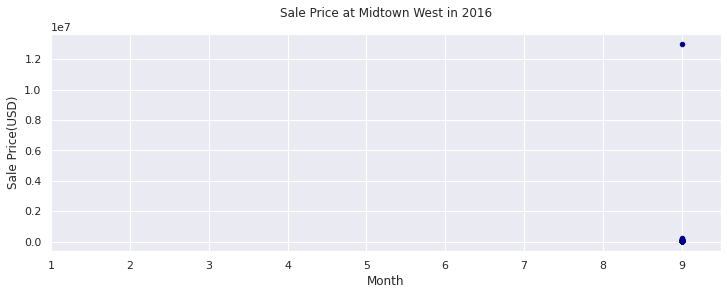

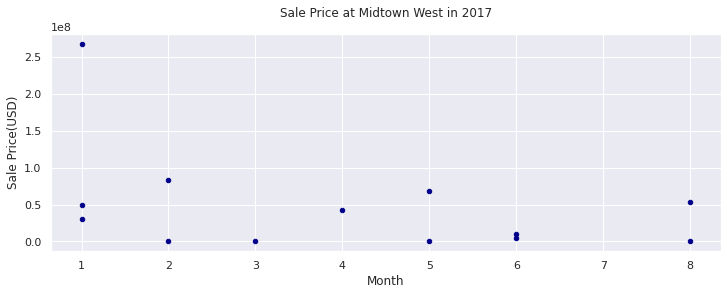

In [ ]:
#SCATTER PLOT SALE PRICE AT MIDTOWN WEST IN 2016

mdw_16_plot = mdw_16.loc[:,('SALE PRICE','MONTH')]
mdw_17_plot = mdw_17.loc[:,('SALE PRICE','MONTH')]

mdw_16_plot.plot(kind='scatter',x='MONTH',y='SALE PRICE',figsize=(12,4),color='darkblue')
plt.xticks(np.arange(1, max(mdw_16_plot['MONTH'])+1, 1.0))
plt.title('Sale Price at Midtown West in 2016',y=1.05)
plt.ylabel('Sale Price(USD)')
plt.xlabel('Month')
plt.show()

#SCATTER PLOT SALE PRICE AT MIDTOWN WEST IN 2017

mdw_17_plot.plot(kind='scatter',x='MONTH',y='SALE PRICE',figsize=(12,4),color='darkblue')
plt.xticks(np.arange(min(mdw_17_plot['MONTH']), max(mdw_17_plot['MONTH'])+1, 1.0))
plt.title('Sale Price at Midtown West in 2017',y=1.05)
plt.ylabel('Sale Price(USD)')
plt.xlabel('Month')
plt.show()